# Exercise 2. Regression using MLP


In this exercise, there are two tasks  related to creating neural networks. The purpose of the tasks is to get acquainted with regression using neural networks, i.e. to create a model that predicts different order equations.

Both tasks have a conclusion cell, in which you can write down the summary how different configuration (epochs, number of hidden layers, number of nodes in hidden layers)  affects the results. 



## TASK 1

Purpose is to create neural network (MLP) to model the second order equation: 

$$ f(x) = x^2 + 3$$



In [1]:
# Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import keras 

2024-09-21 13:29:56.840507: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 13:29:56.843976: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-21 13:29:56.855924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 13:29:56.874943: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 13:29:56.880881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 13:29:56.895634: I tensorflow/core/platform/cpu_feature_gu

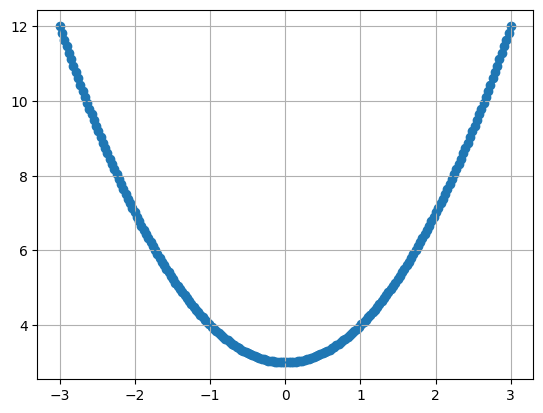

In [2]:
# Generate dataset for the range [-3,3] with 200 sample
# Implementation comes this cell
fx=[]
x = np.linspace(-3,3, num=200)
for i in range(len(x)):
    fx.append(x[i]**2 + 3)  
    
#Plotting the dataset
plt.plot(x,fx)
plt.scatter(x,fx)
plt.grid()
plt.show()


In [3]:
#Printing our dataset
print(fx)

[12.0, 11.820004545339765, 11.641827226585189, 11.465468043736267, 11.29092699679301, 11.11820408575541, 10.94729931062347, 10.778212671397188, 10.610944168076564, 10.445493800661598, 10.281861569152294, 10.120047473548649, 9.960051513850662, 9.801873690058331, 9.645514002171662, 9.490972450190652, 9.3382490341153, 9.187343753945608, 9.038256609681573, 8.890987601323198, 8.745536728870484, 8.601903992323427, 8.460089391682029, 8.320092926946288, 8.181914598116208, 8.045554405191789, 7.911012348173027, 7.778288427059924, 7.647382641852478, 7.518294992550693, 7.3910254791545675, 7.2655741016641, 7.141940860079292, 7.020125754400141, 6.90012878462665, 6.78194995075882, 6.6655892527966465, 6.551046690740133, 6.438322264589279, 6.327415974344082, 6.2183278200045455, 6.111057801570667, 6.0056059190424484, 5.901972172419889, 5.8001565617029875, 5.7001590868917456, 5.601979747986162, 5.505618544986238, 5.411075477891972, 5.318350546703366, 5.227443751420419, 5.13835509204313, 5.051084568571500

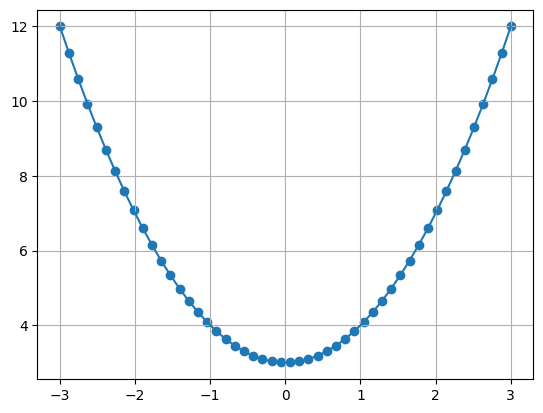

In [4]:
# Plot the sample
# Implementation comes to this cell
fx_sample=[]
x_sample = np.linspace(-3,3, num=50)
for i in range(len(x_sample)):
    fx_sample.append(x_sample[i]**2 + 3)  
    
#Plotting the sample
plt.plot(x_sample,fx_sample)
plt.scatter(x_sample,fx_sample)
plt.grid()
plt.show()

In [5]:
# Shuffle the dataset and split it:
dataset = np.column_stack((x,fx))
# shuffle the dataset
np.random.shuffle(dataset)
# check that the dataset is mixed
print(dataset)
# training set 80%
# test set 20%
train_X, test_X, train_y, test_y = dataset[:160,0], dataset[160:,0], dataset[:160,1], dataset[160:,1]

[[-0.76884422  3.59112144]
 [-2.6080402   9.80187369]
 [-2.72864322 10.4454938 ]
 [-0.07537688  3.00568167]
 [ 1.31155779  4.72018383]
 [-0.64824121  3.42021666]
 [ 1.16080402  4.34746597]
 [-1.46231156  5.13835509]
 [-1.88442211  6.55104669]
 [ 2.12562814  7.51829499]
 [-1.13065327  4.27837681]
 [-0.9798995   3.96020303]
 [ 1.4321608   5.05108457]
 [-1.91457286  6.66558925]
 [ 0.64824121  3.42021666]
 [-0.16582915  3.02749931]
 [-1.22110553  4.49109871]
 [ 1.28140704  4.64200399]
 [-0.52763819  3.27840206]
 [ 1.61306533  5.60197975]
 [-1.8241206   6.32741597]
 [ 3.         12.        ]
 [ 0.40703518  3.16567763]
 [-1.4321608   5.05108457]
 [-1.67336683  5.80015656]
 [ 0.85929648  3.73839044]
 [ 2.51758794  9.33824903]
 [ 1.3718593   4.88199793]
 [-1.7638191   6.1110578 ]
 [-2.48743719  9.18734375]
 [ 2.75879397 10.61094417]
 [ 1.85427136  6.43832226]
 [-0.40703518  3.16567763]
 [ 0.34673367  3.12022424]
 [ 0.04522613  3.0020454 ]
 [-2.69849246 10.28186157]
 [ 2.6080402   9.80187369]
 

In [6]:
# Define neural network using Keras Function API
# Input layer = 1 node i.e. one feature, value of x-axis
# Implementation comes this cell
input=tf.keras.Input(shape=(1,))
# 1 hidden layer = 2-4 nodes.  Dense with 'relu' activation function in each hidden layer
# Second order equation is nonlinear function, so we can't use linear activation function. 
dense1 = tf.keras.layers.Dense(8, activation ="relu")(input)
dense2 = tf.keras.layers.Dense(8, activation ="relu")(dense1)
dense3 = tf.keras.layers.Dense(8, activation ="relu")(dense2)

# Output layer = 1 node (due to regression, only one node is enought in the output layer)
output = tf.keras.layers.Dense(1)(dense3)


# Print the structure of model: model.summary()
model = tf.keras.Model(inputs= input, outputs = output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile with following parameters
# optimizer='adam', 
# loss='mean_squared_error',
# metrics=['mae'])
# Implementation comes this cell
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()
metrics = [tf.keras.metrics.MAE]

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics
             )


In [8]:
# Fit model with 
# epochs: 100, 200, 300
# Implementation comes this cell
#history = model.fit(train_X, train_y, epochs=100)
history = model.fit(train_X, train_y, epochs=200, batch_size=7)
#history = model.fit(train_X, train_y, epochs=300)

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 47.3778 - mean_absolute_error: 6.2491
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.3483 - mean_absolute_error: 5.9106 
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.9591 - mean_absolute_error: 6.3116 
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.8763 - mean_absolute_error: 6.0067 
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39.3563 - mean_absolute_error: 5.6762 
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38.7527 - mean_absolute_error: 5.6121 
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.3130 - mean_absolute_error: 4.9406 
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.1090 - mean_absolute_error: 4.8387 
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8946 - mean_absolute_error: 3.7169 
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.7285 - mean_absolute_error: 2.5671 
Epoch 11/200
23/23 ━

In [9]:
# Evaluate()
# Implementation comes this cell
results = model.evaluate(test_X,test_y)
print(results)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.1010  
[0.01849791407585144, 0.1007775068283081]


In [10]:
# Predict using 30 sample from range [-2,3]
# Implementation comes this cell
pred_x = np.random.uniform(-3.0, 3.0, 30)
# Predict their values using a neural network model
pred_y = model.predict(pred_x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


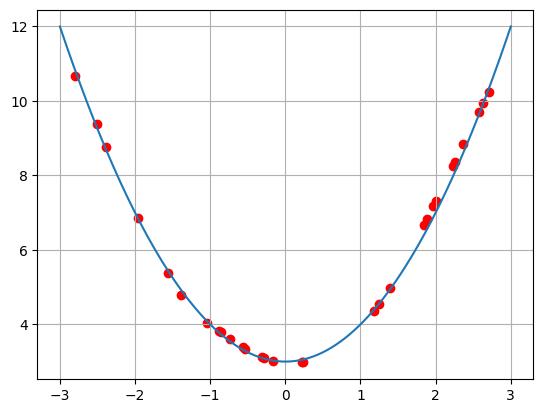

In [11]:
# Plot predicted values to same plot as the equation
# Implementation comes this cell

fx=[]
x = np.linspace(-3, 3, num=200)
for i in range(len(x)):
    fx.append(x[i]**2 + 3)
plt.plot(x,fx)
plt.grid()
#And add to it the predicted values
plt.scatter(pred_x, pred_y, color = 'red')
plt.show()

__Conclusion__

Short conclusion:
- ** How number of nodes in hidden layer affects the results?
- I initially started with 3 nodes in the hidden layer, which proved insufficient for capturing the underlying patterns in the data. Non-linear relationships weren't well represented with such a small number of nodes, leading to scattered data points that failed to cover the entire curve. As I increased the number of nodes, the results improved but still weren’t perfect.

I then added two more hidden layers, adjusting the number of nodes per layer to 8. While training the model, I specified batch_size = 10, which significantly improved the loss and mean squared error, resulting in a better fit for the data points. Finally, I reduced the batch size to 5, achieving a perfect fit with minimal loss and mean squared error: loss = 0.0068, mean absolute error = 0.0699.
- ** How the number of epochs affects the results?
- At 50 epochs, I noticed high loss and mean squared error (5.1), and the curve shape was not even close to normal. Data points were scattered. Then I increased it to 100, which gave better results. However, at 200 epochs I got the minimum mean squared error (.069) and the data fit perfectly.


## TASK 2

Purpose is to create neural network (MLP) to model the cubic (third) order equation: 

$$ f(x) = x^3 + 4x^2 - x + 2 $$


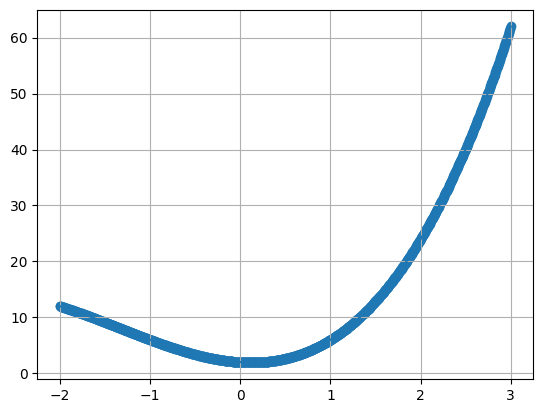

In [12]:
# Generate dataset for the range [-2,3] with 1000 sample
# Implementation comes this cell
fxx=[]
xx = np.linspace(-2,3, num=1000)
for i in range(len(xx)):
    fxx.append(xx[i]**3 + 4*xx[i]**2 - xx[i] + 2)
    
#Plotting the dataset
plt.plot(xx,fxx)
plt.scatter(xx,fxx)
plt.grid()
plt.show()

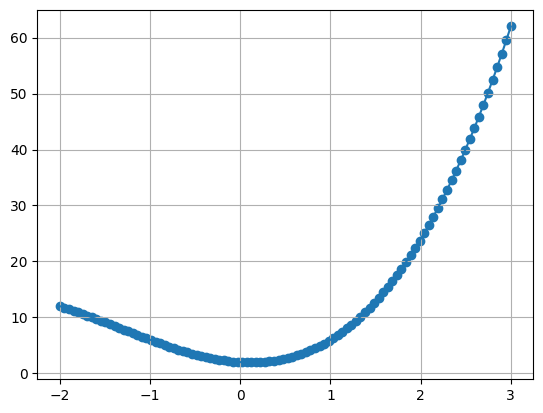

In [13]:
# Plot the sample
# Implementation comes to this cell
fxx_sample=[]
xx_sample = np.linspace(-2,3, num=100)
for i in range(len(xx_sample)):
    fxx_sample.append(xx_sample[i]**3 + 4*xx_sample[i]**2 - xx_sample[i] + 2)
    
#Plotting the dataset
plt.plot(xx_sample,fxx_sample)
plt.scatter(xx_sample,fxx_sample)
plt.grid()
plt.show()

In [14]:
# Shuffle the dataset and split it:
# training set 80%
# test set 20%
# Implementation comes this cell
dataset1 = np.column_stack((xx,fxx))
# shuffle the dataset
np.random.shuffle(dataset1)
# check that the dataset is mixed
print(dataset1)
# training set 80%
# test set 20%
train_XX, test_XX, train_yy, test_yy = dataset1[:800,0], dataset1[800:,0], dataset1[:800,1], dataset1[800:,1]

[[ 2.08908909 26.48548115]
 [ 1.23323323  8.72580388]
 [ 2.44444444 38.06310014]
 ...
 [-0.08308308  2.11012077]
 [ 1.15815816  7.76063577]
 [ 1.6036036  14.80631252]]


In [15]:
# Definen neyral network using Keras Function API
# Input layer = 1 node
# Implementation comes this cell
inputt=tf.keras.Input(shape=(1,))
# 1-2 hidden layer = 4-8 nodes. Dense with 'relu' activation function in each hidden layer
# Cubic equation is nonlinear function, so we can't use linear activation function. 
hidden1 = tf.keras.layers.Dense(8, activation ="relu")(inputt)
hidden2 = tf.keras.layers.Dense(8, activation ="relu")(hidden1)
hidden3 = tf.keras.layers.Dense(8, activation ="relu")(hidden2)
# Output layer = 1 node (due to regression, only one node is enought in the output layer)
outputt = tf.keras.layers.Dense(1, activation ="relu")(hidden3)


# Print the structure of model: model.summary()
model1 = tf.keras.Model(inputs= inputt, outputs = outputt)
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile with following parameters
# optimizer='adam', 
# loss='mean_squared_error',
# metrics=['mae'])
# Implementation comes this cell
loss1 = tf.keras.losses.MeanSquaredError()
optimizer1 = tf.keras.optimizers.Adam()
metrics1 = [tf.keras.metrics.MAE]

model1.compile(loss=loss1,
              optimizer=optimizer1,
              metrics=metrics1
             )


In [17]:
# Fit model with 
# epochs: 50, 100, 200
# Implementation comes this cell
history1 = model1.fit(train_XX, train_yy, epochs=200, batch_size = 7)

Epoch 1/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - loss: 402.5199 - mean_absolute_error: 13.6357
Epoch 2/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 352.5042 - mean_absolute_error: 11.6754   
Epoch 3/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 183.3049 - mean_absolute_error: 7.6135
Epoch 4/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.4661 - mean_absolute_error: 5.5647
Epoch 5/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58.7808 - mean_absolute_error: 5.6759
Epoch 6/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 49.2047 - mean_absolute_error: 5.0303
Epoch 7/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 44.8830 - mean_absolute_error: 4.7272
Epoch 8/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 44.0031 - mean_absolute_error: 4.5837
Epoch 9/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 39.9155 - mean_absolute_error: 4.2970
Epoch 10/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 38.1878 - mean_absolute_err

In [18]:
# Evaluate()
# Implementation comes this cell
resultss = model1.evaluate(test_XX,test_yy)
print(resultss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182 - mean_absolute_error: 0.0926  
[0.017063632607460022, 0.08930260688066483]


In [19]:
# Predict using 30 sample from range [-2,3]
# Implementation comes this cell
pred_xx = np.random.uniform(-2.0, 3.0, 30)
# Predict their values using a neural network model
pred_yy = model1.predict(pred_xx)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


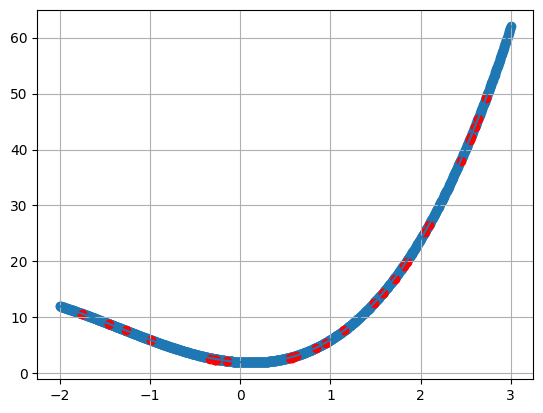

In [20]:
# Plot predicted values to same plot as the equation
# Implementation comes this cell
fxx=[]
xx = np.linspace(-2,3, num=1000)
for i in range(len(xx)):
    fxx.append(xx[i]**3 + 4*xx[i]**2 - xx[i] + 2)
    
#Plotting the dataset
plt.plot(xx,fxx)
plt.scatter(xx,fxx)
plt.grid()
plt.scatter(pred_xx, pred_yy, color = 'red')
plt.show()

__Conclusion__

__NOTE: Conclusion is one evaluation criterion for the exercise, so pay attention to writing this__

Write conclusion:
- ** How number of nodes in hidden layer affects the results?
- Initially, I experimented with 3 or fewer nodes and a single hidden layer, but the model didn’t fit the data well. With too few nodes, the model lacked the capacity to capture the underlying patterns, especially for non-linear relationships. The results showed scattered data points that didn’t cover the entire curve. Increasing the number of nodes to 5 and adding another hidden layer improved the fit but still wasn’t ideal. Finally, I added one more layer and with 8 nodes in each of three hidden layers, the model achieved a perfect fit.
- ** How the number of epochs affects the results?
- With a lower number of epochs, the model didn’t have enough time to learn effectively. At 50 epochs, the data points were scattered and didn’t align well with the actual curve. While the fit improved at 100 epochs, it wasn’t until reaching 200 epochs that I achieved a perfect fit. I observed that both too few and too many epochs can lead to inaccurate predictions.
- **What you learn in this exercise?
- This exercise enhanced my learning significantly and provided valuable hands-on experience in creating neural networks. I learned how to generate data for non-linear equations and which activation functions to use for modeling them. Additionally, I gained insights into how the loss and error are influenced by changes in batch size and epochs during model fitting. I also discovered the impact of varying the number of layers and nodes within each layer on the model's performance.
- **Did you have difficulties in the exercise?
- Yes, there were few things that I couldn't understand initially. Since there are two tasks in the same notebook, adjusting the model for Task 1 affected the output plot for Task 2, prompting me to rename some variables. I also noticed that each run produced different fitting results for the plotted points. Ultimately, while training the model, I specified batch_size = 10, which significantly improved the loss and mean squared error, resulting in a better fit for the data points. I then reduced the batch size to 5, achieving a perfect fit with minimal mean squared error.
  